In [23]:
import numpy as np
import pandas as pd
import random

In [24]:
# new data to combine with initial data (Note: formatted differently from df_2018 data)
df_ks = pd.read_csv("../Data/Cleaned/generated_data.csv")

In [25]:
df_ks.info

<bound method DataFrame.info of         backers_count                                              blurb  \
0                   4  Raising money to help my grandmother recover f...   
1                  11  My work is performance based but I branch out ...   
2                  18  A sanctuary for humans and felines alike! Come...   
3                  42  Taste Makers is a socially conscious brand tha...   
4                  68  The BEST beef sticks, beef jerky and signature...   
...               ...                                                ...   
242625             52  Growing fish and produce year round in the "Po...   
242626            147  Owl Queen is the fifth in a series of Kickstar...   
242627             53  MOMENTS OF INSIGHT is a project consisting of ...   
242628              0  Would like to be able to photograph dream wedd...   
242629           2076  COLD, FRESH, & CARBONATED wherever you go! Cas...   

        blurb_length  spotlight  staff_pick location_st

In [26]:
category=pd.get_dummies(df_ks['category'], prefix=['category'])
category.head()

,['category']_3D Printing,['category']_Academic,['category']_Accessories,['category']_Action,['category']_Animals,['category']_Animation,['category']_Anthologies,['category']_Apparel,['category']_Apps,['category']_Architecture,...,['category']_Wearables,['category']_Weaving,['category']_Web,['category']_Webcomics,['category']_Webseries,['category']_Woodworking,['category']_Workshops,['category']_World Music,['category']_Young Adult,['category']_Zines
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
a=df_ks['country']
uq=a.unique()
countrylist = np.delete(uq, np.where(uq == 'US'))
countrylist

array(['NonUS'], dtype=object)

In [55]:
a.replace(countrylist,'NonUS',inplace=True)
a

0            US
1         NonUS
2            US
3         NonUS
4            US
          ...  
242625    NonUS
242626       US
242627       US
242628    NonUS
242629       US
Name: country, Length: 242630, dtype: object

In [51]:
b=df_ks['location_state']
uq=b.unique()
statelist=uq
for i in uq:
    if len(i)==2:
        statelist=np.delete(statelist, np.where(statelist==i))
statelist

array(['Scotland', 'England', 'NonUS', ..., 'ApurÃ\xadmac',
       'San Fernando', 'Viangchan'], dtype=object)

In [52]:
b.replace(statelist,'NonUS',inplace=True)
b

0            OH
1         NonUS
2            IL
3            BC
4            WI
          ...  
242625       SK
242626       WA
242627       MT
242628       NS
242629       OR
Name: location_state, Length: 242630, dtype: object

In [56]:
b=pd.get_dummies(b, prefix=['location_state'])
b.head()

,['location_state']_AB,['location_state']_AK,['location_state']_AL,['location_state']_AR,['location_state']_AZ,['location_state']_BC,['location_state']_CO,['location_state']_CT,['location_state']_DC,['location_state']_FL,...,['location_state']_SK,['location_state']_TN,['location_state']_TX,['location_state']_UT,['location_state']_VA,['location_state']_VT,['location_state']_WA,['location_state']_WI,['location_state']_WV,['location_state']_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
new=pd.DataFrame(a).join(b).join(category)
new.head()


,country,['location_state']_AB,['location_state']_AK,['location_state']_AL,['location_state']_AR,['location_state']_AZ,['location_state']_BC,['location_state']_CO,['location_state']_CT,['location_state']_DC,...,['category']_Wearables,['category']_Weaving,['category']_Web,['category']_Webcomics,['category']_Webseries,['category']_Woodworking,['category']_Workshops,['category']_World Music,['category']_Young Adult,['category']_Zines
0,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,NonUS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonUS,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
new.columns

Index(['country', '['location_state']_AB', '['location_state']_AK',
       '['location_state']_AL', '['location_state']_AR',
       '['location_state']_AZ', '['location_state']_BC',
       '['location_state']_CO', '['location_state']_CT',
       '['location_state']_DC',
       ...
       '['category']_Wearables', '['category']_Weaving', '['category']_Web',
       '['category']_Webcomics', '['category']_Webseries',
       '['category']_Woodworking', '['category']_Workshops',
       '['category']_World Music', '['category']_Young Adult',
       '['category']_Zines'],
      dtype='object', length=222)

In [66]:
tosave=df_ks.drop(['main_category','category','location_state','country'],axis=1)
tosave=tosave.join(new)
tosave.head()

,backers_count,blurb,blurb_length,spotlight,staff_pick,name,deadline,launched,state,usd_pledged_real,...,['category']_Wearables,['category']_Weaving,['category']_Web,['category']_Webcomics,['category']_Webseries,['category']_Woodworking,['category']_Workshops,['category']_World Music,['category']_Young Adult,['category']_Zines
0,4,Raising money to help my grandmother recover f...,24,False,False,Grandma's are Life,2016-11-18,2016-10-19,0.0,62.00,...,0,0,0,0,0,0,0,1,0,0
1,11,My work is performance based but I branch out ...,24,True,False,Meta,2015-05-06,2015-04-08,1.0,266.65,...,0,0,0,0,0,0,0,0,0,0
2,18,A sanctuary for humans and felines alike! Come...,24,False,False,Puss N' Books: A relaxing cat cafe and bookstore.,2015-11-26,2015-10-27,0.0,776.00,...,0,0,0,0,0,0,0,0,0,0
3,42,Taste Makers is a socially conscious brand tha...,23,False,True,TASTE MAKERS BY TRISH P,2015-07-30,2015-06-15,0.0,2144.39,...,0,0,0,0,0,0,0,0,0,0
4,68,"The BEST beef sticks, beef jerky and signature...",13,True,False,The Meat Candy Experience,2016-07-01,2016-05-17,1.0,3239.00,...,0,0,0,0,0,0,0,0,0,0


In [67]:
tosave.to_csv("../Data/Cleaned/latest_data.csv", index = False)

In [ ]:
new.replace(["US",'NonUS'],[1,0],inplace=True)


In [119]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


df_stack=new.join(df_ks['duration_days']).join(df_ks['count_7_days']).join(df_ks['optimism'])
min_max_scaler = preprocessing.MinMaxScaler()
df_stack = min_max_scaler.fit_transform(df_stack)

X_train, X_test, y_train, y_test = train_test_split(df_stack,df_ks['state'] , test_size=0.2,random_state=17)

In [120]:
from sklearn.decomposition import PCA
import seaborn as sns



pca = PCA(n_components=100)
pca_result = pca.fit_transform(X_train)

In [121]:
new.shape

(242630, 222)

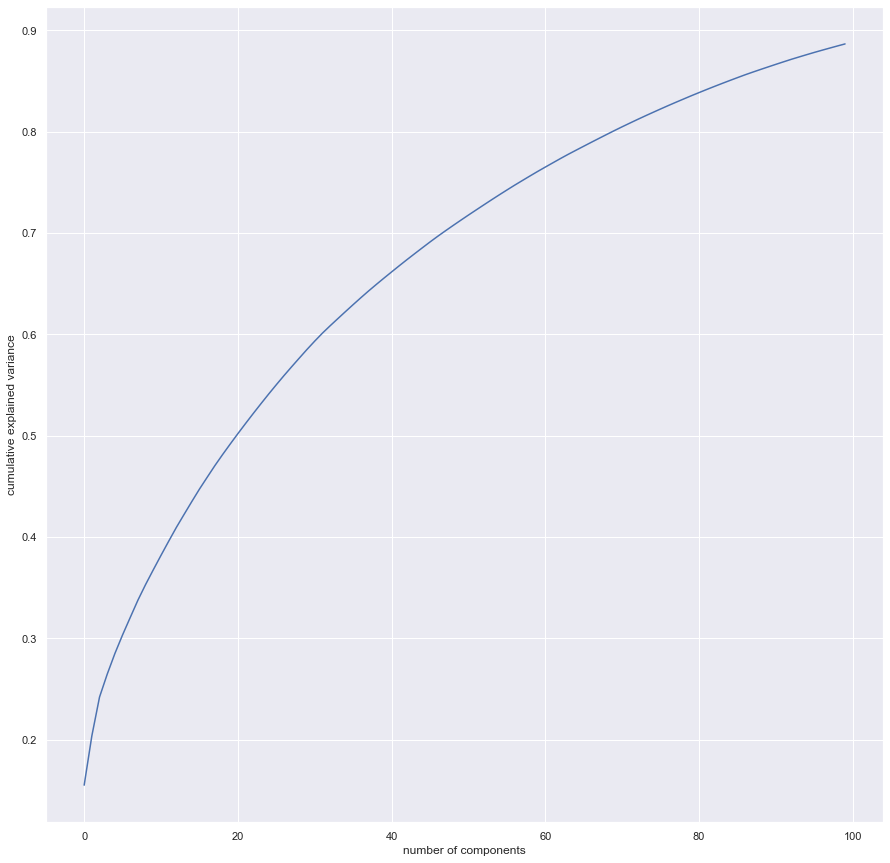

In [122]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

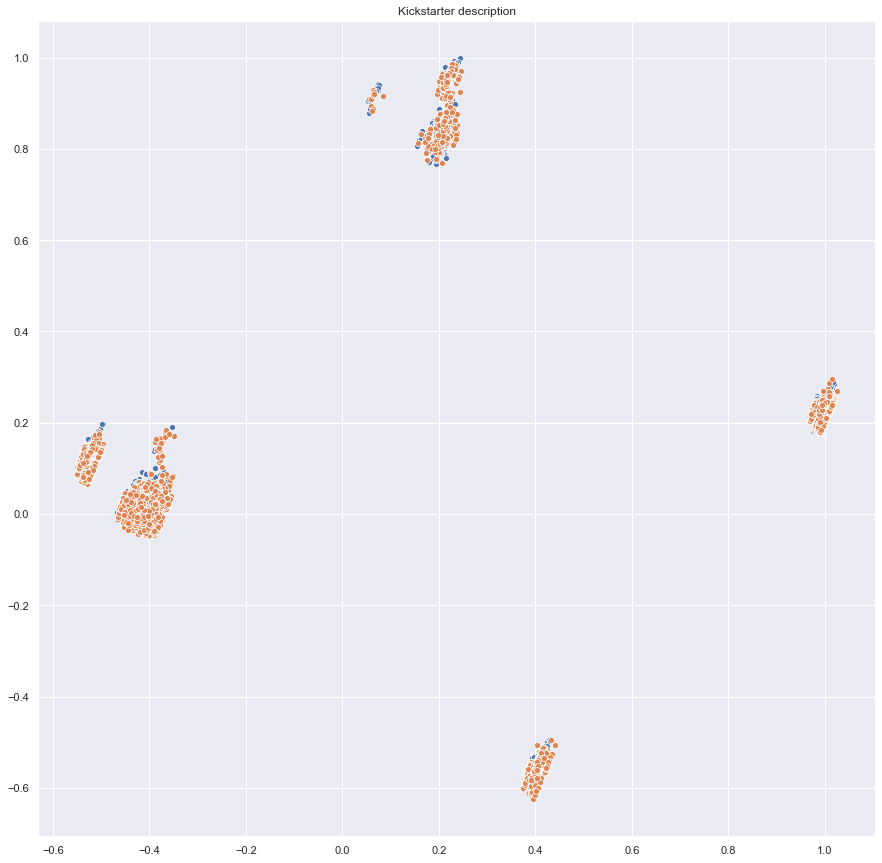

In [128]:

# color
pca_result = pca.transform(X_test)
pca_fail=pca_result[y_test==0,:]
pca_succ=pca_result[y_test==1,:]

sns.set(rc={'figure.figsize':(15,15)})
fail = sns.color_palette("bright", 1)
succ= sns.color_palette("dark", 1)
# plot
#sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=fail)
sns.scatterplot(pca_fail[:,0], pca_fail[:,1], palette=fail)
sns.scatterplot(pca_succ[:,0], pca_succ[:,1], palette=succ)

plt.title("Kickstarter description")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Trying the decision tree
names = []
scores = []
models = []
pca_data=pca.transform(df_stack)
X_train, X_test, y_train, y_test = train_test_split(pca_data,df_ks['state'] , test_size=0.2,random_state=17)
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(criterion='entropy', random_state=42)))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.698141
1   DT  0.655010


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.18681319e-01, 3.57865685e-01, 3.63635556e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.96703297e-01, 4.99540018e-01, 6.00438672e-07],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.18681319e-01, 3.90524379e-01, 4.84847677e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.83516484e-01, 4.21803128e-01, 2.22952242e-05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.83516484e-01, 3.24287029e-01, 4.04032323e-06]])